# Introduction

This notebook is a guided end-to-end deep learning project for beginners. The notebook contains almost everything in a data science lifecycle, starting from data cleaning, visualization, exploratory data analysis, to building the deep learning model to predict whether or not a certain tumor, given historical data, is benign or malignant. There will be comments every step of the way so there is a clear understanding.

# Neural Networks and Deep Learning

Now, for this problem statement, I could have used any classification technique, such as logistic regression, etc. But instead, I am using neural networks so the algorithm can be structured in such a way, so the model can interpret, learn and make decisions on its own; opposed to machine learning models that only predict based on what it has learned from historical data.

**What are Neural Networks?**

Neural Network, or Artificial Neural Network (ANN), is a method that teaches computers to process data in a way that is inspired by the human brain. They reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning.

**What is deep learning?**

Neural networks make up the backbone of deep learning algorithms. It is the number of node layers, or depth, of neural networks that distinguishes a single neural network from a deep learning algorithm. So multiple layers of interconnected neural networks make a deep learning algorithm.

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf # for deep learning
tf.random.set_seed(3) # to reduce randomization and force accuracy to remain constant
from tensorflow import keras # acts as an interface for tensorflow

In [2]:
cancer_data = pd.read_csv('../input/breastcancer/breast_cancer_data.csv')
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Cleaning

In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Dropping the unnamed: 32 and id columns
cancer_data.drop(columns='Unnamed: 32', axis = 1, inplace=True)
cancer_data.drop(columns='id', axis = 1, inplace=True)

In [5]:
# Checking for missing values
cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values in our dataset.

# Exploratory Data Analysis

In [6]:
# Statistical Analysis
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We can see, our target column is divided in the ratio 62.7:37.3.

In [8]:
# Encoding the target column 
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(cancer_data['diagnosis'])
cancer_data['target'] = labels
cancer_data.drop(columns='diagnosis', axis=1, inplace=True)

In [9]:
cancer_data['target'].value_counts() # Benign: 0 Malignant: 1

0    357
1    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

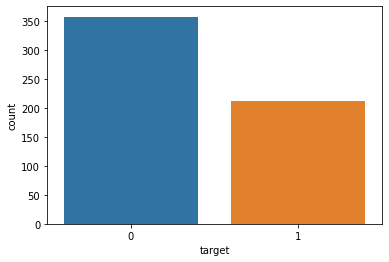

In [10]:
sns.countplot(x='target', data=cancer_data)

# Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

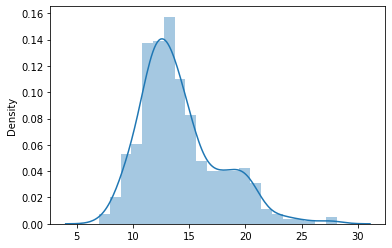

In [11]:
sns.distplot(x=cancer_data.radius_mean)

Mean radius skewness lies on the right mainly.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


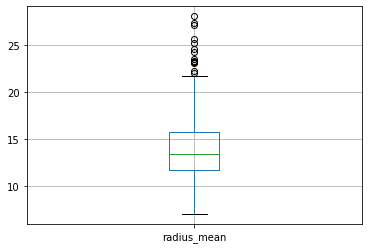

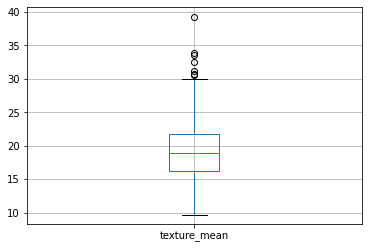

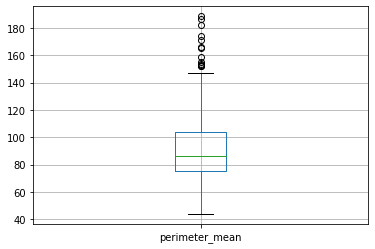

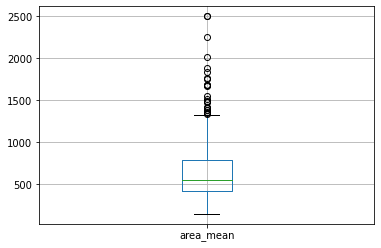

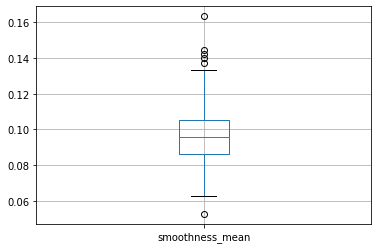

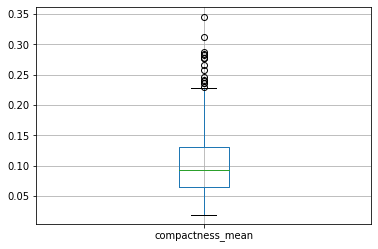

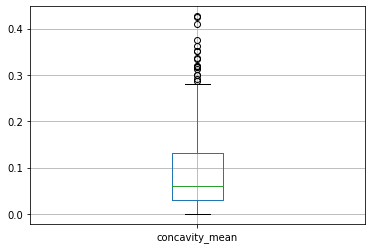

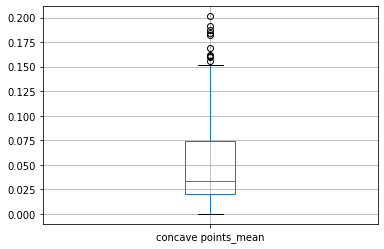

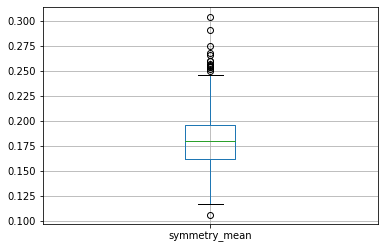

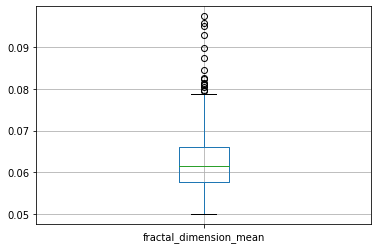

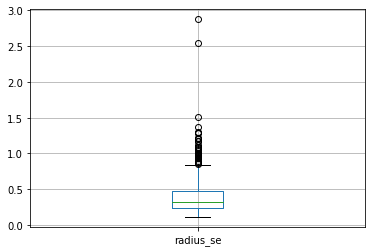

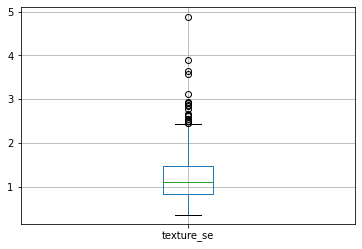

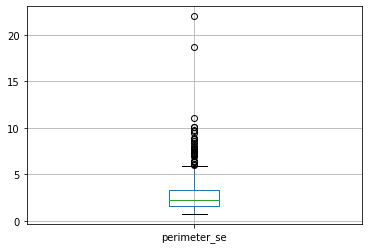

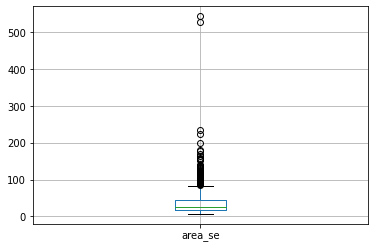

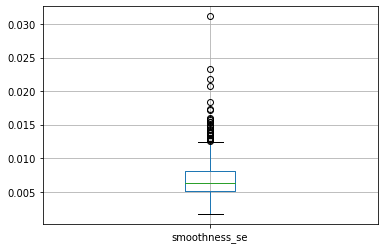

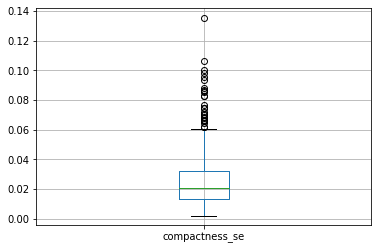

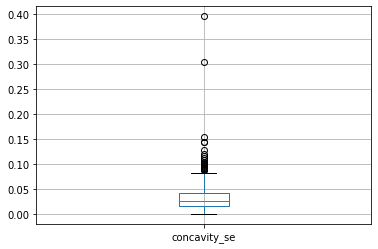

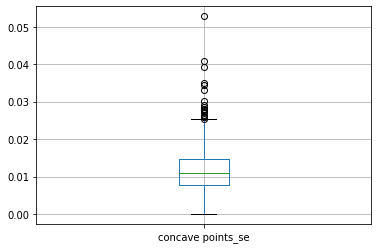

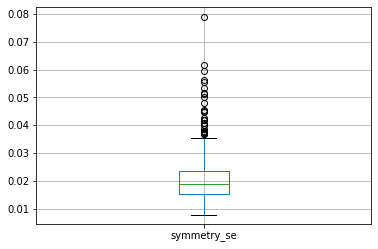

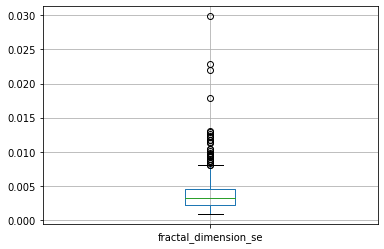

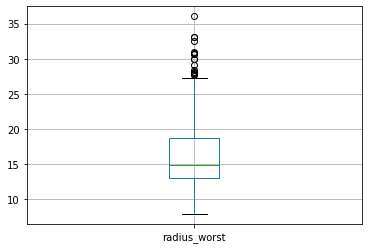

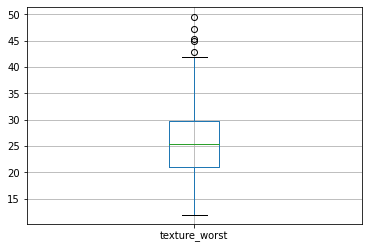

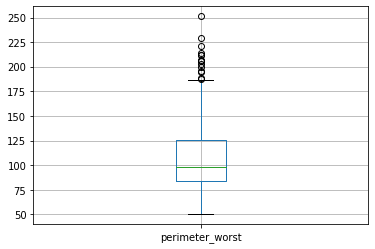

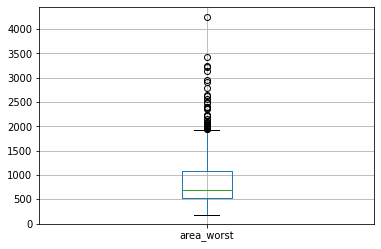

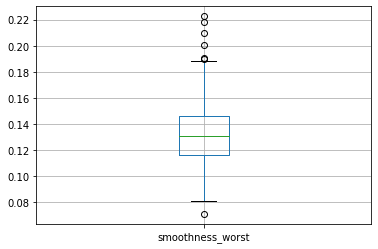

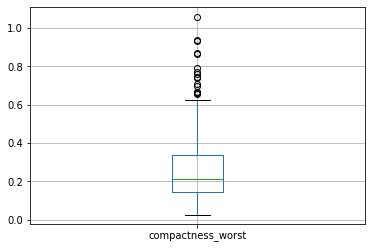

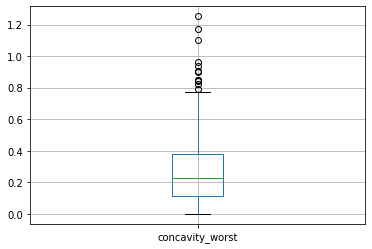

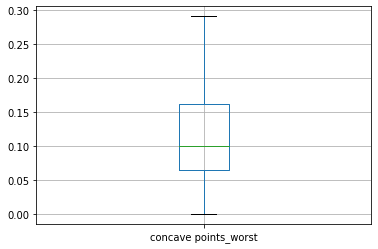

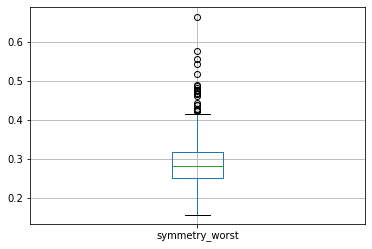

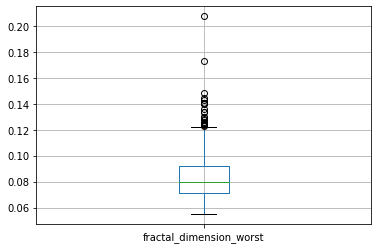

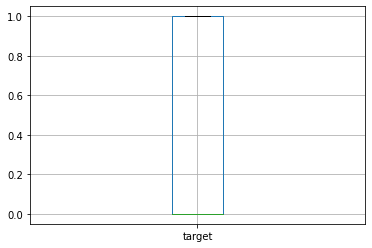

In [12]:
for column in cancer_data:
    plt.figure()
    cancer_data.boxplot([column])

Almost all the features have outliers.

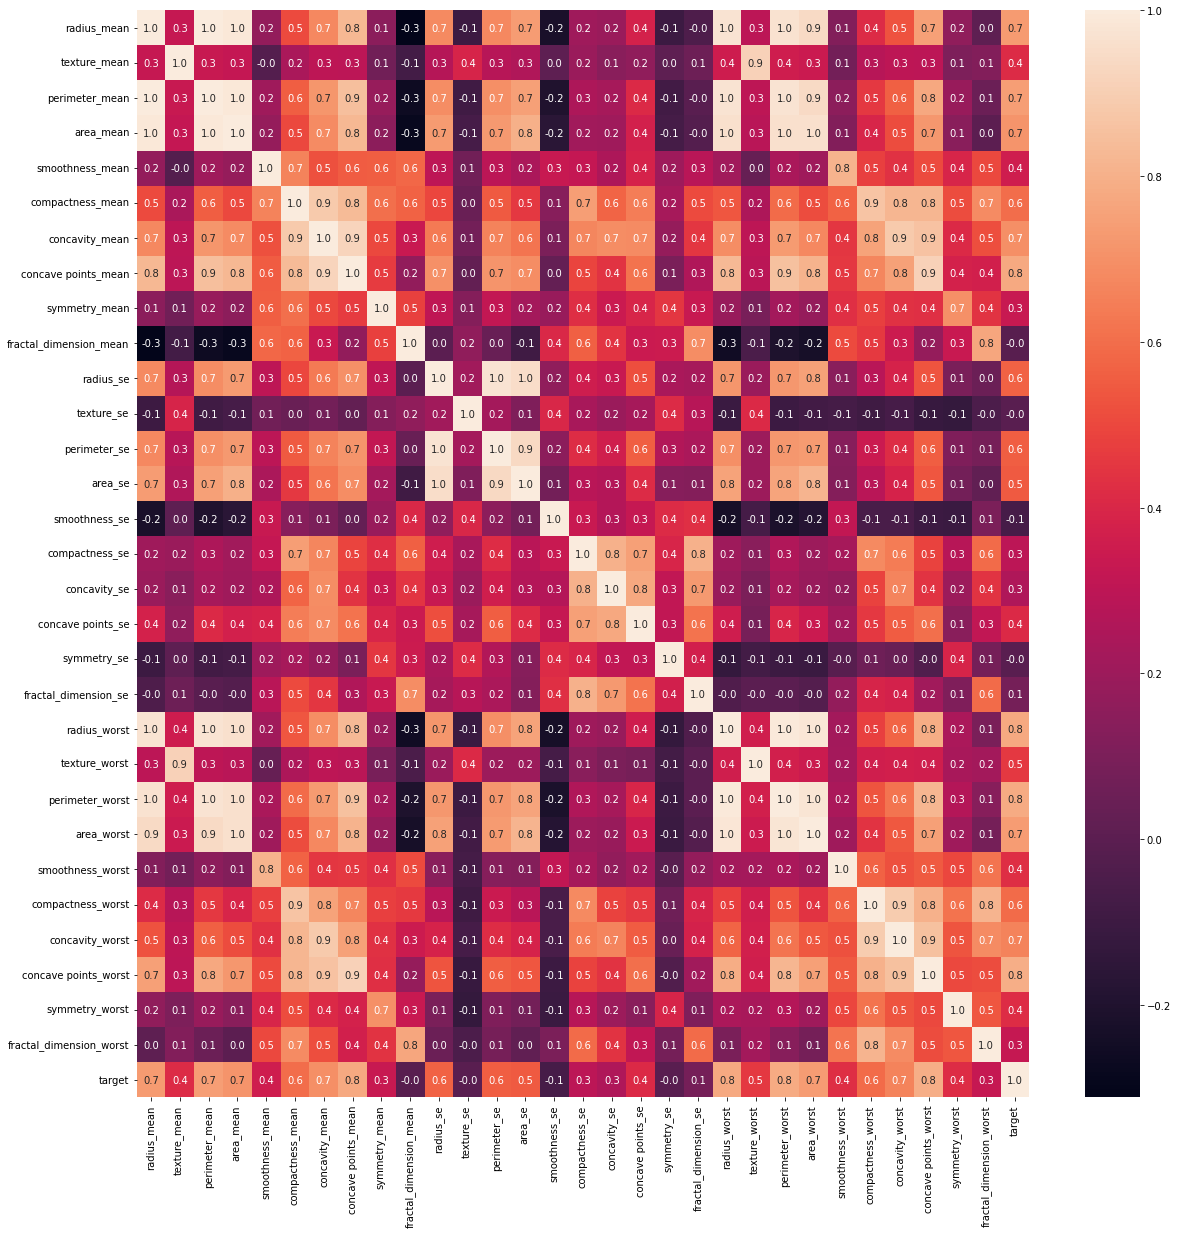

In [13]:
# Heatmap to visualize correlation
corr = cancer_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True)
plt.savefig('Correlation Heat map')

Higher intensities in the correlations of most features mean most of the data are highly correlated.

# Splitting Data

In [14]:
# Separating features from target
X = cancer_data.drop(columns='target', axis=1)
Y = cancer_data['target']

In [15]:
# Splitting into training and testing data 0.8:0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# Data Standardization

In [16]:
# Standardizing Data 
scaler = StandardScaler()

X_train_standard = scaler.fit_transform(X_train)

X_test_standard = scaler.transform(X_test)

# Data standardization is the process of converting data to a common format to enable users to process and analyze it.

# Neural Network

We are going to have multiple layers; first layer will be input layer, last will be output layer and everything in the middle will be hidden where all the magic really happens.

In [17]:
# Setting up  layers of the Neural Network

layers = keras.Sequential([keras.layers.Flatten(input_shape=(30,)), # input (30 is no. of columns in dataset)
                          keras.layers.Dense(20, activation='relu'), # hidden (contains 20 neurons)
                           keras.layers.Dense(30, activation='relu'), # another hidden layer (contains 30 neurons)
                           keras.layers.Dense(20, activation='relu'), # another hidden layer
                          keras.layers.Dense(2, activation='sigmoid')]) # output (2 neurons {benign and malignant})

2022-07-08 16:28:17.475170: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Flatten converts data into single dimensional array (Matrix becomes single array).

Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer.



**Activation Function?**

Activation function is used to generate or define a particular output for a given node based on the input is getting provided.

Sigmoid function is known as the logistic function which helps to normalize the output of any input in the range between 0 to 1. The main purpose of the activation function is to maintain the output or predicted value in the particular range, which makes the good efficiency and accuracy of the model.


The rectified linear activation function  (ReLU) for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [18]:
# Compile the Neural Network

layers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the neural network

model = layers.fit(X_train_standard, Y_train, validation_split=0.1, epochs=15) # epochs is basically the number of times our model will go through the data

2022-07-08 16:28:17.909957: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
13/13 [==============================] - 1s 23ms/step - loss: 0.4517 - accuracy: 0.7971 - val_loss: 0.3469 - val_accuracy: 0.9130
Epoch 2/15
13/13 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.9022 - val_loss: 0.2502 - val_accuracy: 0.9130
Epoch 3/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2121 - accuracy: 0.9389 - val_loss: 0.1834 - val_accuracy: 0.9348
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 0.1518 - accuracy: 0.9560 - val_loss: 0.1429 - val_accuracy: 0.9565
Epoch 5/15
13/13 [==============================] - 0s 6ms/step - loss: 0.1148 - accuracy: 0.9707 - val_loss: 0.1207 - val_accuracy: 0.9565
Epoch 6/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0952 - accuracy: 0.9756 - val_loss: 0.1140 - val_accuracy: 0.9565
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.9804 - val_loss: 0.1034 - val_accuracy: 0.9565
Epoch 8/15
13/13 [=

See how as epochs increase, accuracy increases?

Such high accuracy may have resulted from the use of multiple hidden layers/ multiple neurons/ standardizing data, but don't get too excited and increase layer after layer or neuron after neuron as it may result in data overfitting.

* Overfitting: Good performance on the training data, poor generliazation to other data. 
* Underfitting: Poor performance on the training data and poor generalization to other data.

**So, we're done buidling the model. Now, let's evaluate it.**

In [20]:
# Accuracy on test data
accuracy = layers.evaluate(X_test_standard, Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.9561
[0.1476198434829712, 0.9561403393745422]


# Now let's predict!

In [21]:
# taking input data (Chose a random row from the original dataset)
data = (19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)

numpy_array_input = np.asarray(data) # Converting input data to numpy array
numpy_array_input = numpy_array_input.reshape(1,-1) # Reshaping the numpy array as we are predicting for only one row
input_data_standard = scaler.transform(numpy_array_input) # Standardizing the data
predict = layers.predict(input_data_standard) # Now predicting
print(predict)
prediction_label = [np.argmax(predict)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Benign')

else:
  print('The tumor is Malignant')

[[1.5944242e-04 8.9155263e-01]]
[1]
The tumor is Malignant


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


So our neural network predicted accurately!

# Workflow

So basically the workflow is like this: Import libraries and dataset -> Data Cleaning -> EDA -> Data Visualization -> Splitting the data -> Data standardization -> Building the neural network -> Prediction.